# Plot convergence time for naming game 

In [1]:
import numpy as np
from tqdm.notebook import tqdm
import csv
import networkx as nx
import random
import pickle
import pandas as pd
from itertools import groupby
import matplotlib.pyplot as plt
import os

In [2]:
plt.rcParams.update({'font.size': 10})

In [3]:
#dataset = "pr_school";gap = 300;state_gap = 1200;nb_states_L = 3;nb_states_e = 8
#dataset = "h_school11";gap = 1200;state_gap = 1200;nb_states_L = 3;nb_states_e = 7
#dataset = "h_school13";gap = 1200;state_gap = 1200;nb_states_L = 4;nb_states_e = 29
#dataset = "InVS15"; gap = 3600; state_gap = 3600; nb_states_L = 3;nb_states_e = 12
dataset = "hypertext";gap = 1200;state_gap = 1200;nb_states_L = 3;nb_states_e = 20

In [4]:
nets = ['D','E','ES','EST']

# Functions

In [5]:
def load_t_list(filename):
    t_list_ = []
    file=open(filename, 'r')
    content =file.read().splitlines()
    for line in content:
        t, names = line.split(' ',2)
        #print(names)
        t_list_.append(float(t))
    file.close()
    return t_list_

In [6]:
def plot_histograms(distr_orig,distr_E,distr_ES,distr_EST,num_bin):
    

    ##computing the bin properties (same for both distributions)
    m = min(min(distr_orig),min(distr_E),min(distr_EST),min(distr_ES))
    M = max(max(distr_orig),max(distr_E),max(distr_EST),max(distr_ES))
    #print(m,M)
    #bin_lims = np.linspace(min(distr_orig),max(max(distr_orig),max(distr_etn_mean),max(distr_ES_mean),max(distr_EST_mean)),num_bin+1)
    bin_lims = np.linspace(m,M,num_bin+1)
    bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
    bin_widths = bin_lims[1:]-bin_lims[:-1]

    ##computing the histograms
    hist_orig, _ = np.histogram(distr_orig, bins=bin_lims,density=True)
    hist_E, _ = np.histogram(distr_E, bins=bin_lims,density=True)
    hist_ES, _ = np.histogram(distr_ES, bins=bin_lims,density=True)
    hist_EST, _ = np.histogram(distr_EST, bins=bin_lims,density=True)

    #fig, ax1 = plt.subplots(nrows = 1, ncols = 1,figsize=(3,2.6)) # pr_school
    fig, ax1 = plt.subplots(nrows = 1, ncols = 1,figsize=(3.4,2.2)) # SI
    ax1.plot(bin_centers, hist_orig,'o-',markersize=7, label='D',color=D_color)
    ax1.plot(bin_centers, hist_E,'v-',markersize=4, label='E',color=E_color)
    ax1.plot(bin_centers, hist_ES,'^-',markersize=4, label='ES',color=ES_color)
    ax1.plot(bin_centers, hist_EST,'o-',markersize=4, label='EST',color=EST_color)

    
    ax1.set_xlabel('Convergence time [h]')
    #ax1.set_yscale('log')
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [0,3,2,1]
    ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    fig.tight_layout()


# Plot

In [7]:
folder = 'figs/' # to save results
if not os.path.exists(folder):
    os.makedirs(folder)

In [8]:
D_color = "#656565"
E_color = '#ffcc5c'
ES_color = '#88d8b0'
EST_color = '#ff6f69'

In [9]:
eta_range = np.linspace(0.4,1,num=7)

0.4


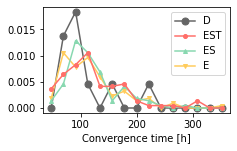

0.5


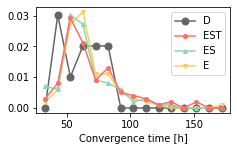

0.6


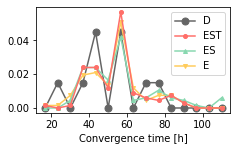

0.7


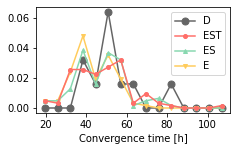

0.8


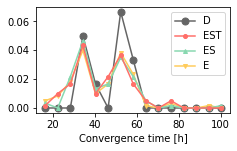

0.8999999999999999


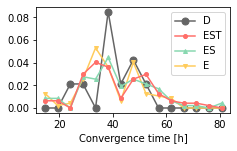

1.0


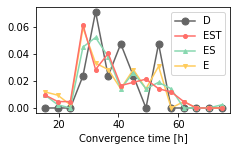

In [11]:
for eta in eta_range:
    print(eta)
    for net in nets:
        filename = "results/%s_%s_eta_%.2f.txt"%(dataset,net,eta)
        t_list = load_t_list(filename)
        t_h = np.array(t_list)*gap/3600
        globals()['t_%s'%net] = t_h
    plot_histograms(t_D,t_E,t_ES,t_EST,15)
    plt.savefig('figs/conv_time_%s_eta_%.1f.pdf'%(dataset,eta))
    plt.show()